## Задание 1
Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''В качестве датасета была выбрана динамика акций фондового рынка США за 1962-2017'''
stocks = {}
directory = "Data/Stocks/"

# os.listdir(directory)
for stock in os.listdir(directory):
    stock_name = stock.split(".")[0]
    stocks[stock_name] = pd.read_csv(
        f'Data/Stocks/{stock}',
        names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'],
        skiprows = 1
    )

In [3]:
stocks_all = pd.concat(stocks).reset_index(level=1, drop=True)
stocks_all.head()

,Date,Open,High,Low,Close,Volume,OpenInt
a,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
a,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
a,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
a,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
a,1999-11-24,27.083,28.309,27.002,27.717,5132147,0


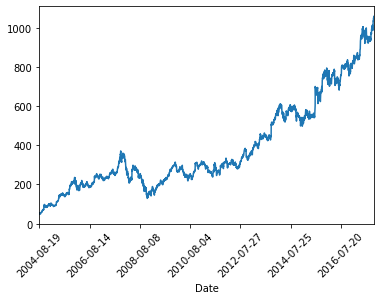

In [4]:
'''1. График цены акций Гугла за период наблюдений.
Выбран простой линейчатый график, т.к. смотрим динамику одной переменной.'''
stocks_all[stocks_all.index == 'googl'].groupby('Date').sum().sort_values('Date').Close.plot(rot = 45)

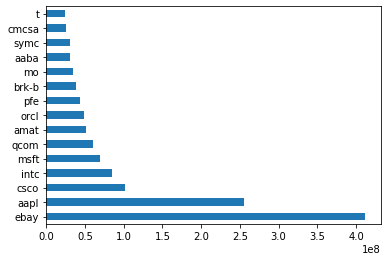

In [5]:
'''2. Смотрим самые торгуемые акции за выбранную дату.
Выбран горизонтальный столбчатый график, т.к. можно наглядно сравнить объем торгов. Сделок с акциями ebay сделали на почти вдвое большую сумму, чем с Apple.'''
stocks_all[stocks_all.Date == '2005-01-20'].sort_values('Volume', ascending = False)['Volume'].head(15).plot(kind = 'barh', x = 'Volume', y = 'Name')

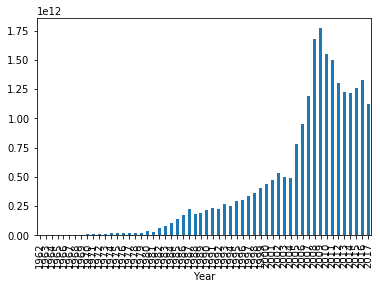

In [30]:
'''3. Смотрим суммарный объем торгов по годам.
Выбран вертикальный столбчатый график, т.к. можно наглядно сравнить объем торгов в динамике.'''
stocks_all.groupby('Year')['Volume'].sum().plot(kind = 'bar')

In [31]:
import seaborn as sns

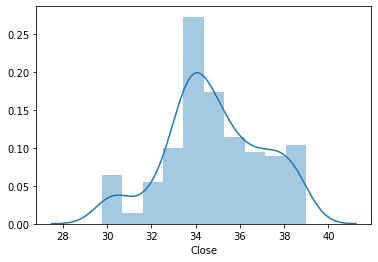

In [40]:
'''4. Смотрим распределение цены акции ebay в 2017 году.
Используем специализированный гарфик. Видим распределение близкое к нормальному.'''
sns.distplot(stocks_all[(stocks_all['Year'] == 2017) & (stocks_all.index == 'ebay')]['Close'])

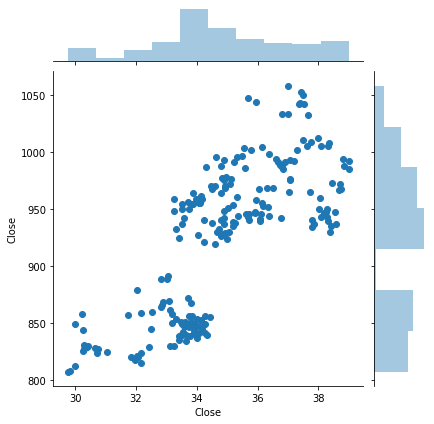

In [44]:
'''5. Смотрим есть ли корреляция цены акций googl и цены акций ebay.
Используем scatterplot. На графике видна прямая корреляция между ценами на акции этих двух компаний.'''
sns.jointplot(
    x = stocks_all[(stocks_all['Year'] == 2017) & (stocks_all.index == 'ebay')]['Close'], 
    y = stocks_all[(stocks_all['Year'] == 2017) & (stocks_all.index == 'googl')]['Close'], 
    kind='scatter'
                                                                                     )